# Pandas
1. Pandas provides data structures and functionality to quicklymanipulate and analyze data.
2. The main data structures are:
    1. Series:
        1. Is a one dimensional array.
        2. You can access the data in a series like a NumPy array and like a dictionary.
    2. DataFrame:
        1. Is a multi-dimensional array. 
3. DataFrame is many series concatenated together:
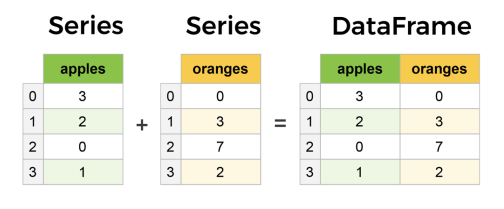
4. In DataFrame and Series the rows and columns can be labeled.

In [1]:
import pandas as pd
import numpy as np

**Create Series**

In [128]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [129]:
# Specify the indeces
s = pd.Series([1, 2, 3, 4], index = ["A", "B", "C", "D"])
s

A    1
B    2
C    3
D    4
dtype: int64

**Create DataFrame**

In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(1,10,(5,4)),index=["A", "B", "C", "D", "E"],columns=["W", "X", "Y", "Z"])
df

,W,X,Y,Z
A,5,9,1,6
B,7,9,4,9
C,2,2,1,7
D,6,7,3,5
E,2,3,5,8


In [5]:
# anotehr way
df = pd.DataFrame([[1, 444, 'abc'],
                   [2, 555, 'def'],
                   [3, 666, 'ghi'],
                   [4, 444, 'xyz']], columns=["col1", "col2", "col3"])
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [6]:
# anotehr way
df = pd.DataFrame([[1, 444, 'abc'],
                   [2, 555, 'def'],
                   [3, 666, 'ghi'],
                   [4, 444, 'xyz']])
df.columns =["col1", "col2", "col3"]
df 

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [7]:
# another way
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


# Data type of series
1. **Here are the main DataTypes of Pandas Series:**
    1. **Numeric Data Types**:
       - int64: Integer values with 64 bits. Example: 1, 2, -3.
       - float64: Floating-point values with 64 bits. Example: 3.14, -0.5, 2.0.

    2. **Object Data Type**:
       - object: Represents **string values** or a **mix of different types**. The object dtype **can hold any Python object**, making it the most general datatype in Pandas.

    3. **Categorical Data Type**:
       - category: Represents categorical variables with a fixed, limited number of unique values. This data type is useful for reducing memory usage and speeding up certain operations.
       - Designed to handle discrete and categorical data.

    4. **Boolean Data Type**:
       - bool: Represents boolean values True or False. 

    5. **DateTime Data Type**:
       - datetime64: Represents date and time values. Example: 2021-09-01 12:34:56.

    6. **Timedelta Data Type**:
       - timedelta64: Represents differences in dates or times. Example: 2 days, 3 hours, 30 minutes.

2. **Representing the data this way is essential for efficiently storing and manipulating data in Pandas Series**:

    1. **Memory Usage**:
       - Data types with larger sizes, such as float64 or int64, consume more memory than smaller ones, like int32 or float32. Using the appropriate data type can help conserve memory and improve performance.

    2. **Operations and Functions**:
       - Different data types have different capabilities and behaviors when it comes to performing arithmetic operations, aggregations, or comparisons. For example, integer and floating-point data types behave differently when dividing or summing elements in a Series.

    3. **Missing Values**:
       - Some data types support NaN (Not a Number) to represent missing values, while others may not. Float data types, for instance, can handle NaN, whereas integer types cannot directly represent missing values.

    4. **Time Series Operations**:
       - DateTime and Timedelta data types provide specific functionalities for working with time-related data, like time-based indexing, date arithmetic, and time differences.

    5. **Categorical Data**:
       - The categorical data type is useful when working with categorical variables that have a limited set of unique values. It can optimize memory usage and improve the performance of certain operations.


# You said "categorical Data Represents categorical variables with a fixed, limited number of unique values". If that's the case why don't we represent the Object data as Categorical data since they also have fixed, limited number of unique values?

You raise a valid point, and you are correct that in some cases, representing Object data as categorical data can be beneficial. However, there are some important distinctions between Object and categorical datatypes:

1. **Internal Storage and Performance**: The main difference is how Pandas internally stores the data:
    - **Object datatype** allows for arbitrary Python objects, including strings, lists, dictionaries, and more. This allows flexibility but comes at the cost of increased memory and slower performance because Pandas needs to store pointers to these arbitrary objects. 
    - **Categorical datatype**, on the other hand, uses a separate mapping to represent the distinct values in the Series as integers, which saves memory and allows for faster operations.
    - **Categorical datatype** is particularly useful when a column has a limited number of unique values compared to the number of rows in the DataFrame.
    - **Object datatype** is useful for columns with a large number of unique values or where each entry is unique (e.g., free-text comments) can be more efficient. 

2. **Sorting and Comparisons**: 
    - **Categorical datatypes** have a defined order, which can be useful in sorting and comparing data.
    - **Object datatypes** don't have a specific order, making certain operations more complex or less efficient.

    3. **Flexibility**: 
    - **categorical datatype** might not be suitable when you have dynamic or changing categories. 
    - **Object datatype** allows you to have different data types for each element (dynamic categories), which can be more flexible in some scenarios.

4. **In summary**:
    - **Categorical datatype** is advantageous when you have a fixed, limited number of unique values in a column. 
    - However, if your data is diverse and includes different Python objects or if you need the flexibility of having various data types in the same column, using the **Object datatype** is more appropriate.
    
# Ok another question, if we have a numeric column that represents a discrete variable, Is it true that it'd be better if we represent this column as a categorical column, and is this possible?

1. Yes, it is often beneficial to represent a numeric column that represents a discrete variable as a categorical column in Pandas.
2. Examples:
    - Gender: values 0 and 1 represent male and female. 
    - Education levels: values 1, 2, 3 represent different levels of education
    - Age groups: 1 for children, 2 for teenagers, 3 for adults, etc.

To convert a numeric column to a categorical column in Pandas, you can use the `astype()` method or the `pd.Categorical` constructor. Here's an example:

```python
import pandas as pd

# Sample DataFrame with a numeric column representing a discrete variable
data = {
    'education_level': [1, 2, 3, 1, 3, 2, 1, 2]
}

df = pd.DataFrame(data)

# Convert the 'education_level' column to categorical
df['education_level'] = df['education_level'].astype('category')
```

In [134]:
# Datatype of all columns
df.dtypes

col1     int64
col2     int64
col3    object
dtype: object

In [135]:
# Datatype of one column
df['col1'].dtype

dtype('int64')

**Change the datatype of a column**

In [15]:
df["col1"][2] = 4


C:\Users\AMIT\AppData\Local\Temp\ipykernel_11728\2367076084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"][2] = 4


In [16]:
df["col1"] = df["col1"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   col1    4 non-null      category
 1   col2    4 non-null      int64   
 2   col3    4 non-null      object  
dtypes: category(1), int64(1), object(1)
memory usage: 328.0+ bytes


# EDA

**Head**

In [17]:
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,4,666,ghi
3,4,444,xyz


In [18]:
df.head(2)

,col1,col2,col3
0,1,444,abc
1,2,555,def


**Tail**

In [19]:
df.tail()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,4,666,ghi
3,4,444,xyz


In [20]:
df.tail(2)

,col1,col2,col3
2,4,666,ghi
3,4,444,xyz


**Info**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   col1    4 non-null      category
 1   col2    4 non-null      int64   
 2   col3    4 non-null      object  
dtypes: category(1), int64(1), object(1)
memory usage: 328.0+ bytes


**Describe**
1. Get statistics about numerical columns, like: mean, median, min, max, Q1, Q2, etc.
2. Get statistics about categorical columns, like: unique values, mode, its frequency, etc. 

In [22]:
# get statistics about numerical data
df.describe()

,col2
count,4.000000
mean,527.250000
std,106.274409
min,444.000000
25%,444.000000
50%,499.500000
75%,582.750000
max,666.000000


In [23]:
# get statistics about categorical data
df.describe(include="category")

,col1
count,4
unique,3
top,4
freq,2


In [25]:
# get statistics aboutall discrete data (categorical and object)
df.describe(include=['int', "category", "object"])

,col1,col2,col3
count,4.0,4.000000,4
unique,3.0,NaN,4
top,4.0,NaN,abc
freq,2.0,NaN,1
mean,NaN,527.250000,NaN
std,NaN,106.274409,NaN
min,NaN,444.000000,NaN
25%,NaN,444.000000,NaN
50%,NaN,499.500000,NaN
75%,NaN,582.750000,NaN


**Get Index names**

In [145]:
df.index

RangeIndex(start=0, stop=4, step=1)

**Get Columns names**

In [146]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

**Unique Values**

In [26]:
df.col2

0    444
1    555
2    666
3    444
Name: col2, dtype: int64

In [148]:
# get the unique values
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [149]:
# get number of unique values
df['col2'].nunique()

3

**count unique values in a column**

In [27]:
d = df['col2'].value_counts()
print(d)
print("--------")
print(d[444])

444    2
555    1
666    1
Name: col2, dtype: int64
--------
2


**Get sum of column values**

In [29]:
df["col2"]

0    444
1    555
2    666
3    444
Name: col2, dtype: int64

In [152]:
df['col2'].sum()

2109

# Operations

**Series to numpy**

In [28]:
df['col1'].values

[1, 2, 4, 4]
Categories (3, int64): [1, 2, 4]

**Apply function**

In [35]:
def duplicate(x):
    return x*2

df['col2'].apply(duplicate)
# df['col1'].dtype

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [36]:
df['col3']

0    abc
1    def
2    ghi
3    xyz
Name: col3, dtype: object

In [155]:
# apply built in function
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [156]:
# or use lambda function 
df['col1'].apply(lambda x: x*2)

0    2
1    4
2    6
3    8
Name: col1, dtype: category
Categories (4, int64): [2, 4, 6, 8]

In [157]:
# another example
df2 = pd.DataFrame([[1, 'ALI'  , 3],
                    [5, 'OMAR' , 8],
                    [4, 'AHMED', 9]])
df2.apply(lambda x: x*2)

,0,1,2
0,2,ALIALI,6
1,10,OMAROMAR,16
2,8,AHMEDAHMED,18


**Sort column values**

In [42]:
sorted_df = df.sort_values('col2')
sorted_df

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,4,666,ghi


In [43]:
# sort a dataframe decendingly
sorted_df = df.sort_values(by='col2', ascending=False)
sorted_df

,col1,col2,col3
2,4,666,ghi
1,2,555,def
0,1,444,abc
3,4,444,xyz


In [46]:
# sort the df itself
df.sort_values(by='col2', inplace=True)
df

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,4,666,ghi


# Selection and Indexing

**Selection of one Column**: This returns a series.

In [47]:
print(type(df['col2']))

df['col2']

<class 'pandas.core.series.Series'>


0    444
3    444
1    555
2    666
Name: col2, dtype: int64

**Selection of many Columns**: This returns a DataFrame.

In [48]:
# use iloc slicing
print(df.iloc[:, 0:1])
type(df.iloc[:, 0:1])

  col1
0    1
3    4
1    2
2    4


pandas.core.frame.DataFrame

In [163]:
# use loc slicing
df.loc[:, ["col1", "col2"]]
# df.loc[:, "W"]

,col1,col2
0,1,444
3,4,444
1,2,555
2,3,666


In [164]:
# pass a list of columns names
df[['col1','col2']]

,col1,col2
0,1,444
3,4,444
1,2,555
2,3,666


**Conditional Selection**

In [165]:
df['col2'] == 0

0    False
3    False
1    False
2    False
Name: col2, dtype: bool

In [49]:
df[df['col2']>445]

,col1,col2,col3
1,2,555,def
2,4,666,ghi


In [50]:
import pandas as pd
df = pd.DataFrame({'W':[0.624422,2.987908,-0.568837,0.640644,-1.027215],'X':[-0.191951,0.335460,0.982931,-0.599352,0.205850],'Y':[-2.255381,0.081844,-0.632550,-0.256207,1.532482],'Z':[-2.271271,-0.283476,-0.746803,-0.201674,0.023060]} , index = ['A','B' ,'C','D','E'])

In [51]:
df

,W,X,Y,Z
A,0.624422,-0.191951,-2.255381,-2.271271
B,2.987908,0.335460,0.081844,-0.283476
C,-0.568837,0.982931,-0.632550,-0.746803
D,0.640644,-0.599352,-0.256207,-0.201674
E,-1.027215,0.205850,1.532482,0.023060


In [169]:
df[['W','Y']] >80

,W,Y
A,False,False
B,False,False
C,False,False
D,False,False
E,False,False


In [170]:
df>0

,W,X,Y,Z
A,True,False,False,False
B,True,True,True,False
C,False,True,False,False
D,True,False,False,False
E,False,True,True,True


# Creating a new column

In [52]:
df['new'] = df['W'] + df['Y']
df

,W,X,Y,Z,new
A,0.624422,-0.191951,-2.255381,-2.271271,-1.630959
B,2.987908,0.335460,0.081844,-0.283476,3.069752
C,-0.568837,0.982931,-0.632550,-0.746803,-1.201387
D,0.640644,-0.599352,-0.256207,-0.201674,0.384437
E,-1.027215,0.205850,1.532482,0.023060,0.505267


# Dropping or Removing Columns

In [54]:
# the column will not be removed from the original DF
df.drop('new',axis=1)

,W,X,Y,Z
A,0.624422,-0.191951,-2.255381,-2.271271
B,2.987908,0.335460,0.081844,-0.283476
C,-0.568837,0.982931,-0.632550,-0.746803
D,0.640644,-0.599352,-0.256207,-0.201674
E,-1.027215,0.205850,1.532482,0.023060


In [55]:
new_df = df.drop('new',axis=1)
new_df

,W,X,Y,Z
A,0.624422,-0.191951,-2.255381,-2.271271
B,2.987908,0.335460,0.081844,-0.283476
C,-0.568837,0.982931,-0.632550,-0.746803
D,0.640644,-0.599352,-0.256207,-0.201674
E,-1.027215,0.205850,1.532482,0.023060


In [56]:
# directly drop the column from the DataFrame
df.drop("new", axis=1, inplace=True)

In [175]:
# # or use del to directly remove or drop the column
# del df['col1']
# df

# Change column position

In [176]:
df

,W,X,Y,Z
A,0.624422,-0.191951,-2.255381,-2.271271
B,2.987908,0.335460,0.081844,-0.283476
C,-0.568837,0.982931,-0.632550,-0.746803
D,0.640644,-0.599352,-0.256207,-0.201674
E,-1.027215,0.205850,1.532482,0.023060


In [58]:
# Move the second column to the last position
column_names = df.columns.tolist()
column_names.append(column_names.pop(1))
# column_names
df[column_names]
# column_names


,W,Y,Z,X
A,0.624422,-2.255381,-2.271271,-0.191951
B,2.987908,0.081844,-0.283476,0.335460
C,-0.568837,-0.632550,-0.746803,0.982931
D,0.640644,-0.256207,-0.201674,-0.599352
E,-1.027215,1.532482,0.023060,0.205850


In [61]:
# column_names = df.columns.tolist()
# column_names.append(column_names.pop(1))
# column_names

['W', 'Y', 'Z', 'X']

In [60]:
# column_names.pop(1)

'X'

# Dropping or Removing Rows
Not used in Practice 

In [63]:
num_index_df = pd.DataFrame([[1, 2, 3],
                             [4, 5, 6]])
num_index_df

,0,1,2
0,1,2,3
1,4,5,6


In [64]:
num_index_df.drop(0, axis=0)

,0,1,2
1,4,5,6


# Null Values

**Check for null values**

In [65]:
df.isnull().sum()

W    0
X    0
Y    0
Z    0
dtype: int64

In [181]:
# anotehr way
df = pd.DataFrame([[1, 444, 'abc'],
                   [2, 555, 'def'],
                   [3, 666, 'ghi'],
                   [4, 444, 'xyz']])
df.columns = columns=["col1", "col2", "col3"]
df 

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


# Missing Data

In [182]:
import numpy as np
import pandas as pd

In [67]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,None],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [184]:
# drop rows with missing values
new = df.dropna()
new 

,A,B,C
0,1.0,5.0,1


In [185]:
# drop columns with missing values
new = df.dropna(axis=1)
new

,C
0,1
1,2
2,3


In [186]:
# drop rows with less than 2 non-null values
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [68]:
# fill Null values
df.fillna(value='FILL VALUE')

,A,B,C
0,1.0,5.0,1
1,2.0,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [188]:
# replace non values with the mean
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [189]:
data = pd.DataFrame({'A': [1, 2, None, 4, 5],
        'B': [None, 3, 4, 5, None],
        'C': [7, 8, 9, None, 11]})
data

,A,B,C
0,1.0,NaN,7.0
1,2.0,3.0,8.0
2,NaN,4.0,9.0
3,4.0,5.0,NaN
4,5.0,NaN,11.0


In [190]:
print(data.mean())
data.fillna(data.mean(), inplace=True)
data

A    3.00
B    4.00
C    8.75
dtype: float64


,A,B,C
0,1.0,4.0,7.00
1,2.0,3.0,8.00
2,3.0,4.0,9.00
3,4.0,5.0,8.75
4,5.0,4.0,11.00


In [1]:
# pd.options.display.max_rows = 9999